<a href="https://colab.research.google.com/github/APARNAGADHIYA/Fall-Activity-Recognition_UP-Fall/blob/main/MLP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Fall_Detection_Using_Human_Skeleton_Features/CSVFiles/Merged.csv", low_memory= False)

In [ ]:
dataset.shape

(16880, 38)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16880 non-null  int64  
 1   Unnamed: 0.1  16880 non-null  int64  
 2   Nose_X        16880 non-null  float64
 3   Nose_Y        16880 non-null  float64
 4   LEye_X        16880 non-null  float64
 5   LEye_Y        16880 non-null  float64
 6   REye_X        16880 non-null  float64
 7   REye_Y        16880 non-null  float64
 8   LEar_X        16880 non-null  float64
 9   LEar_Y        16880 non-null  float64
 10  REar_X        16880 non-null  float64
 11  REar_Y        16880 non-null  float64
 12  LShoulder_X   16880 non-null  float64
 13  LShoulder_Y   16880 non-null  float64
 14  RShoulder_X   16880 non-null  float64
 15  RShoulder_Y   16880 non-null  float64
 16  LElbow_X      16880 non-null  float64
 17  LElbow_Y      16880 non-null  float64
 18  RElbow_X      16880 non-nu

In [ ]:
dataset['Activity'].value_counts()

1    3480
9    3403
4    2609
5    2547
3    2505
2    2336
Name: Activity, dtype: int64

In [ ]:
exp=pd.read_csv("/content/drive/MyDrive/Fall_Detection_Using_Human_Skeleton_Features/CSVFiles/Merged.csv", usecols=["Nose_X","Nose_Y","LEye_X","LEye_Y","REye_X","REye_Y","LEar_X","LEar_Y","REar_X","REar_Y",
         "LShoulder_X","LShoulder_Y","RShoulder_X","RShoulder_Y","LElbow_X","LElbow_Y","RElbow_X","RElbow_Y",
         "LWrist_X","LWrist_Y","RWrist_X","RWrist_Y","LHip_X","LHip_Y","RHip_X","RHip_Y","LKnee_X","LKnee_Y",
         "Rknee_X","Rknee_Y","LAnkle_X","LAnkle_Y","RAnkle_X","RAnkle_Y",'Score','Activity'])
print(exp)

           Nose_X      Nose_Y      LEye_X  ...    RAnkle_Y     Score  Activity
0      418.167908  212.008392  423.865479  ...  462.701935  3.071887         1
1      419.789581  214.127029  425.524384  ...  463.591003  3.090761         1
2      417.496674  212.123474  423.200043  ...  463.070984  3.083132         1
3      416.467834  211.306610  422.378326  ...  462.503693  3.042056         1
4      417.535492  210.987717  420.436218  ...  463.350586  3.021970         1
...           ...         ...         ...  ...         ...       ...       ...
16875  236.192459  165.997910  235.464157  ...  239.920486  1.761851         9
16876  175.626114  197.964188  178.481979  ...  437.856934  3.103301         9
16877  236.625092  166.702301  234.447464  ...  239.652954  1.731628         9
16878  176.308823  197.406448  179.172104  ...  437.922272  3.112766         9
16879  236.532440  166.294113  235.753250  ...  243.044205  1.898677         9

[16880 rows x 36 columns]


In [ ]:
exp.shape

(16880, 36)

In [ ]:
exp.head()

,Nose_X,Nose_Y,LEye_X,LEye_Y,REye_X,REye_Y,LEar_X,LEar_Y,REar_X,REar_Y,LShoulder_X,LShoulder_Y,RShoulder_X,RShoulder_Y,LElbow_X,LElbow_Y,RElbow_X,RElbow_Y,LWrist_X,LWrist_Y,RWrist_X,RWrist_Y,LHip_X,LHip_Y,RHip_X,RHip_Y,LKnee_X,LKnee_Y,Rknee_X,Rknee_Y,LAnkle_X,LAnkle_Y,RAnkle_X,RAnkle_Y,Score,Activity
0,418.167908,212.008392,423.865479,206.310822,418.167908,206.310822,446.655792,206.310822,443.807007,206.310822,469.446136,243.345093,432.411865,237.647507,463.748535,308.867249,421.016693,286.076935,423.865479,343.052734,406.772736,328.808807,463.748535,354.447906,435.260651,348.750336,463.748535,419.970093,443.807007,414.272491,466.597351,471.248291,446.655792,462.701935,3.071887,1
1,419.789581,214.127029,425.524384,205.524811,416.922180,205.524811,445.596191,205.524811,442.728790,205.524811,471.402832,245.668442,434.126587,237.066238,465.668030,305.883881,422.656982,285.812073,442.728790,357.497131,411.187378,325.955688,465.668030,351.762329,434.126587,346.027527,462.800629,420.579987,442.728790,414.845154,465.668030,472.193207,448.463593,463.591003,3.090761,1
2,417.496674,212.123474,423.200043,206.420120,417.496674,206.420120,446.013458,206.420120,440.310089,206.420120,471.678528,246.343582,434.606750,237.788559,465.975189,306.228790,423.200043,283.415375,454.568481,363.262329,414.645020,323.338837,465.975189,351.855621,434.606750,346.152252,463.123505,420.295837,443.161774,414.592499,465.975189,471.626007,448.865112,463.070984,3.083132,1
3,416.467834,211.306610,422.378326,205.396088,416.467834,205.396088,446.020416,205.396088,440.109894,205.396088,469.662506,246.769730,434.199371,237.903946,472.617767,308.830170,434.199371,288.143372,469.662506,362.024841,419.423065,320.651215,460.796722,353.159088,434.199371,347.248566,463.751984,424.085297,443.065155,412.264282,466.707245,471.369446,448.975677,462.503693,3.042056,1
4,417.535492,210.987717,420.436218,205.186279,414.634766,205.186279,443.641998,208.086990,440.741272,208.086990,469.748505,245.796387,434.939819,237.094223,481.351379,306.711548,437.840546,289.307220,481.351379,361.825287,423.336945,324.115906,458.145599,353.123108,432.039124,347.321686,463.947052,422.740448,443.641998,414.038300,466.847778,472.052734,446.542725,463.350586,3.021970,1


In [ ]:
exp['Activity'].value_counts()

1    3480
9    3403
4    2609
5    2547
3    2505
2    2336
Name: Activity, dtype: int64

In [ ]:
activities = exp['Activity'].value_counts().index
activities

Int64Index([1, 9, 4, 5, 3, 2], dtype='int64')

In [ ]:
Falling_Sideways= exp[exp['Activity']== 4].head(2336).copy()
Falling_Backwards= exp[exp['Activity']== 3].head(2336).copy()
Falling_Forward_Using_Hands= exp[exp['Activity']== 1].head(2336).copy()
Falling_Forward_Using_Knees = exp[exp['Activity']== 2].copy()
Falling_Sitting_in_Empty_Chair = exp[exp['Activity']== 5].head(2336).copy()
Picking_Up_an_Object= exp[exp['Activity']== 9].head(2336).copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Falling_Forward_Using_Hands,Falling_Forward_Using_Knees,Falling_Backwards,Falling_Sideways,Falling_Sitting_in_Empty_Chair,Picking_Up_an_Object])
balanced_data.shape

(14016, 36)

In [ ]:
balanced_data['Activity'].value_counts()

5    2336
4    2336
3    2336
2    2336
9    2336
1    2336
Name: Activity, dtype: int64

In [ ]:
balanced_data.head()

,Nose_X,Nose_Y,LEye_X,LEye_Y,REye_X,REye_Y,LEar_X,LEar_Y,REar_X,REar_Y,LShoulder_X,LShoulder_Y,RShoulder_X,RShoulder_Y,LElbow_X,LElbow_Y,RElbow_X,RElbow_Y,LWrist_X,LWrist_Y,RWrist_X,RWrist_Y,LHip_X,LHip_Y,RHip_X,RHip_Y,LKnee_X,LKnee_Y,Rknee_X,Rknee_Y,LAnkle_X,LAnkle_Y,RAnkle_X,RAnkle_Y,Score,Activity
0,418.167908,212.008392,423.865479,206.310822,418.167908,206.310822,446.655792,206.310822,443.807007,206.310822,469.446136,243.345093,432.411865,237.647507,463.748535,308.867249,421.016693,286.076935,423.865479,343.052734,406.772736,328.808807,463.748535,354.447906,435.260651,348.750336,463.748535,419.970093,443.807007,414.272491,466.597351,471.248291,446.655792,462.701935,3.071887,1
1,419.789581,214.127029,425.524384,205.524811,416.922180,205.524811,445.596191,205.524811,442.728790,205.524811,471.402832,245.668442,434.126587,237.066238,465.668030,305.883881,422.656982,285.812073,442.728790,357.497131,411.187378,325.955688,465.668030,351.762329,434.126587,346.027527,462.800629,420.579987,442.728790,414.845154,465.668030,472.193207,448.463593,463.591003,3.090761,1
2,417.496674,212.123474,423.200043,206.420120,417.496674,206.420120,446.013458,206.420120,440.310089,206.420120,471.678528,246.343582,434.606750,237.788559,465.975189,306.228790,423.200043,283.415375,454.568481,363.262329,414.645020,323.338837,465.975189,351.855621,434.606750,346.152252,463.123505,420.295837,443.161774,414.592499,465.975189,471.626007,448.865112,463.070984,3.083132,1
3,416.467834,211.306610,422.378326,205.396088,416.467834,205.396088,446.020416,205.396088,440.109894,205.396088,469.662506,246.769730,434.199371,237.903946,472.617767,308.830170,434.199371,288.143372,469.662506,362.024841,419.423065,320.651215,460.796722,353.159088,434.199371,347.248566,463.751984,424.085297,443.065155,412.264282,466.707245,471.369446,448.975677,462.503693,3.042056,1
4,417.535492,210.987717,420.436218,205.186279,414.634766,205.186279,443.641998,208.086990,440.741272,208.086990,469.748505,245.796387,434.939819,237.094223,481.351379,306.711548,437.840546,289.307220,481.351379,361.825287,423.336945,324.115906,458.145599,353.123108,432.039124,347.321686,463.947052,422.740448,443.641998,414.038300,466.847778,472.052734,446.542725,463.350586,3.021970,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])
balanced_data.head()

,Nose_X,Nose_Y,LEye_X,LEye_Y,REye_X,REye_Y,LEar_X,LEar_Y,REar_X,REar_Y,LShoulder_X,LShoulder_Y,RShoulder_X,RShoulder_Y,LElbow_X,LElbow_Y,RElbow_X,RElbow_Y,LWrist_X,LWrist_Y,RWrist_X,RWrist_Y,LHip_X,LHip_Y,RHip_X,RHip_Y,LKnee_X,LKnee_Y,Rknee_X,Rknee_Y,LAnkle_X,LAnkle_Y,RAnkle_X,RAnkle_Y,Score,Activity,label
0,418.167908,212.008392,423.865479,206.310822,418.167908,206.310822,446.655792,206.310822,443.807007,206.310822,469.446136,243.345093,432.411865,237.647507,463.748535,308.867249,421.016693,286.076935,423.865479,343.052734,406.772736,328.808807,463.748535,354.447906,435.260651,348.750336,463.748535,419.970093,443.807007,414.272491,466.597351,471.248291,446.655792,462.701935,3.071887,1,0
1,419.789581,214.127029,425.524384,205.524811,416.922180,205.524811,445.596191,205.524811,442.728790,205.524811,471.402832,245.668442,434.126587,237.066238,465.668030,305.883881,422.656982,285.812073,442.728790,357.497131,411.187378,325.955688,465.668030,351.762329,434.126587,346.027527,462.800629,420.579987,442.728790,414.845154,465.668030,472.193207,448.463593,463.591003,3.090761,1,0
2,417.496674,212.123474,423.200043,206.420120,417.496674,206.420120,446.013458,206.420120,440.310089,206.420120,471.678528,246.343582,434.606750,237.788559,465.975189,306.228790,423.200043,283.415375,454.568481,363.262329,414.645020,323.338837,465.975189,351.855621,434.606750,346.152252,463.123505,420.295837,443.161774,414.592499,465.975189,471.626007,448.865112,463.070984,3.083132,1,0
3,416.467834,211.306610,422.378326,205.396088,416.467834,205.396088,446.020416,205.396088,440.109894,205.396088,469.662506,246.769730,434.199371,237.903946,472.617767,308.830170,434.199371,288.143372,469.662506,362.024841,419.423065,320.651215,460.796722,353.159088,434.199371,347.248566,463.751984,424.085297,443.065155,412.264282,466.707245,471.369446,448.975677,462.503693,3.042056,1,0
4,417.535492,210.987717,420.436218,205.186279,414.634766,205.186279,443.641998,208.086990,440.741272,208.086990,469.748505,245.796387,434.939819,237.094223,481.351379,306.711548,437.840546,289.307220,481.351379,361.825287,423.336945,324.115906,458.145599,353.123108,432.039124,347.321686,463.947052,422.740448,443.641998,414.038300,466.847778,472.052734,446.542725,463.350586,3.021970,1,0


In [ ]:
label.classes_

array([1, 2, 3, 4, 5, 9])

In [ ]:
X = balanced_data[["Nose_X","Nose_Y","LEye_X","LEye_Y","REye_X","REye_Y","LEar_X","LEar_Y","REar_X","REar_Y",
         "LShoulder_X","LShoulder_Y","RShoulder_X","RShoulder_Y","LElbow_X","LElbow_Y","RElbow_X","RElbow_Y",
         "LWrist_X","LWrist_Y","RWrist_X","RWrist_Y","LHip_X","LHip_Y","RHip_X","RHip_Y","LKnee_X","LKnee_Y",
         "Rknee_X","Rknee_Y","LAnkle_X","LAnkle_Y","RAnkle_X","RAnkle_Y",'Score']]
y = balanced_data['label']

In [ ]:
X.shape

(14016, 35)

In [ ]:
#import scipy.stats as stats
#Fs = 20
#frame_size = Fs*4 # 80
#hop_size = Fs*2 # 40

def get_frames(exp, frame_size, hop_size):

    N_FEATURES = 35

    frames = []
    labels = []
    for i in range(0, len(exp) - frame_size, hop_size):
        nx = exp['Nose_X'].values[i: i + frame_size]
        ny = exp['Nose_Y'].values[i: i + frame_size]
        lex = exp['LEye_X'].values[i: i + frame_size]
        ley = exp['LEye_Y'].values[i: i + frame_size]
        rex = exp['REye_X'].values[i: i + frame_size]
        rey = exp['REye_Y'].values[i: i + frame_size]
        lax = exp['LEar_X'].values[i: i + frame_size]
        lay = exp['LEar_Y'].values[i: i + frame_size]
        rax = exp['REar_X'].values[i: i + frame_size]
        ray = exp['REar_Y'].values[i: i + frame_size]
        lsx = exp['LShoulder_X'].values[i: i + frame_size]
        lsy = exp['LShoulder_Y'].values[i: i + frame_size]
        rsx = exp['RShoulder_X'].values[i: i + frame_size]
        rsy = exp['RShoulder_Y'].values[i: i + frame_size]
        lbx = exp['LElbow_X'].values[i: i + frame_size]
        lby = exp['LElbow_Y'].values[i: i + frame_size]
        rbx = exp['RElbow_X'].values[i: i + frame_size]
        rby = exp['RElbow_Y'].values[i: i + frame_size]
        lwx = exp['LWrist_X'].values[i: i + frame_size]
        lwy = exp['LWrist_Y'].values[i: i + frame_size]
        rwx = exp['RWrist_X'].values[i: i + frame_size]
        rwy = exp['RWrist_Y'].values[i: i + frame_size]
        lhx = exp['LHip_X'].values[i: i + frame_size]
        lhy = exp['LHip_Y'].values[i: i + frame_size]
        rhx = exp['RHip_X'].values[i: i + frame_size]
        rhy = exp['RHip_Y'].values[i: i + frame_size]
        lkx = exp['LKnee_X'].values[i: i + frame_size]
        lky = exp['LKnee_Y'].values[i: i + frame_size]
        rkx = exp['Rknee_X'].values[i: i + frame_size]
        rky = exp['Rknee_Y'].values[i: i + frame_size]
        lanx = exp['LAnkle_X'].values[i: i + frame_size]
        lany = exp['LAnkle_Y'].values[i: i + frame_size]
        ranx = exp['RAnkle_X'].values[i: i + frame_size]
        rany = exp['RAnkle_Y'].values[i: i + frame_size]
        s = exp['Score'].values[i: i + frame_size]

        
        # Retrieve the most often used label in this segment
        label = stats.mode(exp['label'][i: i + frame_size])[0][0]
        frames.append([nx,ny,lex,ley,rex,rey,lax,lay,rax,ray,lsx,lsy,rsx,rsy,lbx,lby,rbx,rby,lbx,lby,rbx,rby,lwx,lwy,rwx,rwy,lhx,lhy,rhx,rhy,lkx,lky,rkx,rky,lanx,lany,ranx,rany,s])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X.shape, y.shape

((14016, 35), (14016,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((9811, 35), (4205, 35))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(9811, 35)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[617  66   9   3   3   3]
 [ 13 678   3   5   2   0]
 [  9  12 621   4  55   0]
 [  3  17   8 657  15   1]
 [  4   9  16   3 668   1]
 [  0   0   1   0   0 699]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       701
           1       0.87      0.97      0.91       701
           2       0.94      0.89      0.91       701
           3       0.98      0.94      0.96       701
           4       0.90      0.95      0.93       701
           5       0.99      1.00      1.00       700

    accuracy                           0.94      4205
   macro avg       0.94      0.94      0.94      4205
weighted avg       0.94      0.94      0.94      4205



[[0.95510836 0.08439898 0.01367781 0.00446429 0.00403769 0.00426136]
 [0.02012384 0.86700767 0.00455927 0.00744048 0.00269179 0.        ]
 [0.01393189 0.01534527 0.943769   0.00595238 0.07402423 0.        ]
 [0.00464396 0.02173913 0.01215805 0.97767857 0.02018843 0.00142045]
 [0.00619195 0.01150895 0.02431611 0.00446429 0.89905787 0.00142045]
 [0.         0.         0.00151976 0.         0.         0.99289773]]


Text(0.5, 0, 'Predicted label')

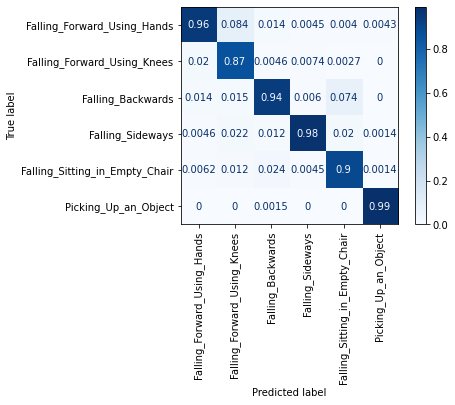

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
class_names=['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Picking_Up_an_Object']
display_cm = plot_confusion_matrix(mlp, X_test, y_test,display_labels=class_names, cmap=plt.cm.Blues, normalize='pred',xticks_rotation='vertical')
print(display_cm.confusion_matrix)
#figure = plt.figure(figsize=(6,6))
#plt.tight_layout(pad=1.5,h_pad=None,w_pad=None,rect=None)
plt.ylabel('True label')
plt.xlabel('Predicted label')